In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt  #data visualization

import seaborn as sb #Advanced data visualization

In [5]:
df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']

In [6]:
df

,Class label,Alcohol,Malic acid
0,fixed_acidity,volatile_acidity,citric_acid
1,11.6,0.58,0.66
2,10.4,0.61,0.49
3,7.4,1.185,0.0
4,10.4,0.44,0.42
...,...,...,...
20996,9.7,1.02,0.91
20997,10.2,0.61,0.88
20998,13.4,0.46,1.04
20999,6.6,1.03,1.09


<Axes: xlabel='Alcohol', ylabel='Density'>

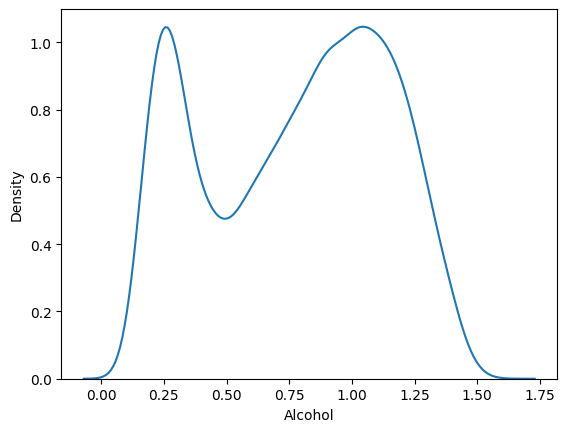

In [7]:
# Convert columns to numeric
df['Alcohol'] = pd.to_numeric(df['Alcohol'], errors='coerce')
df['Malic acid'] = pd.to_numeric(df['Malic acid'], errors='coerce')

sb.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

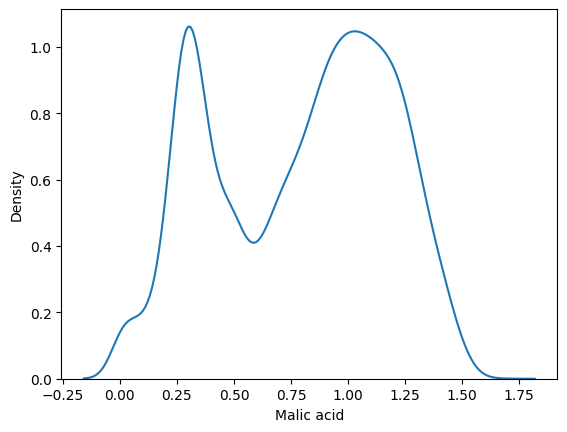

In [8]:
# Convert 'Class label' to numeric
df['Class label'] = pd.to_numeric(df['Class label'], errors='coerce')

sb.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

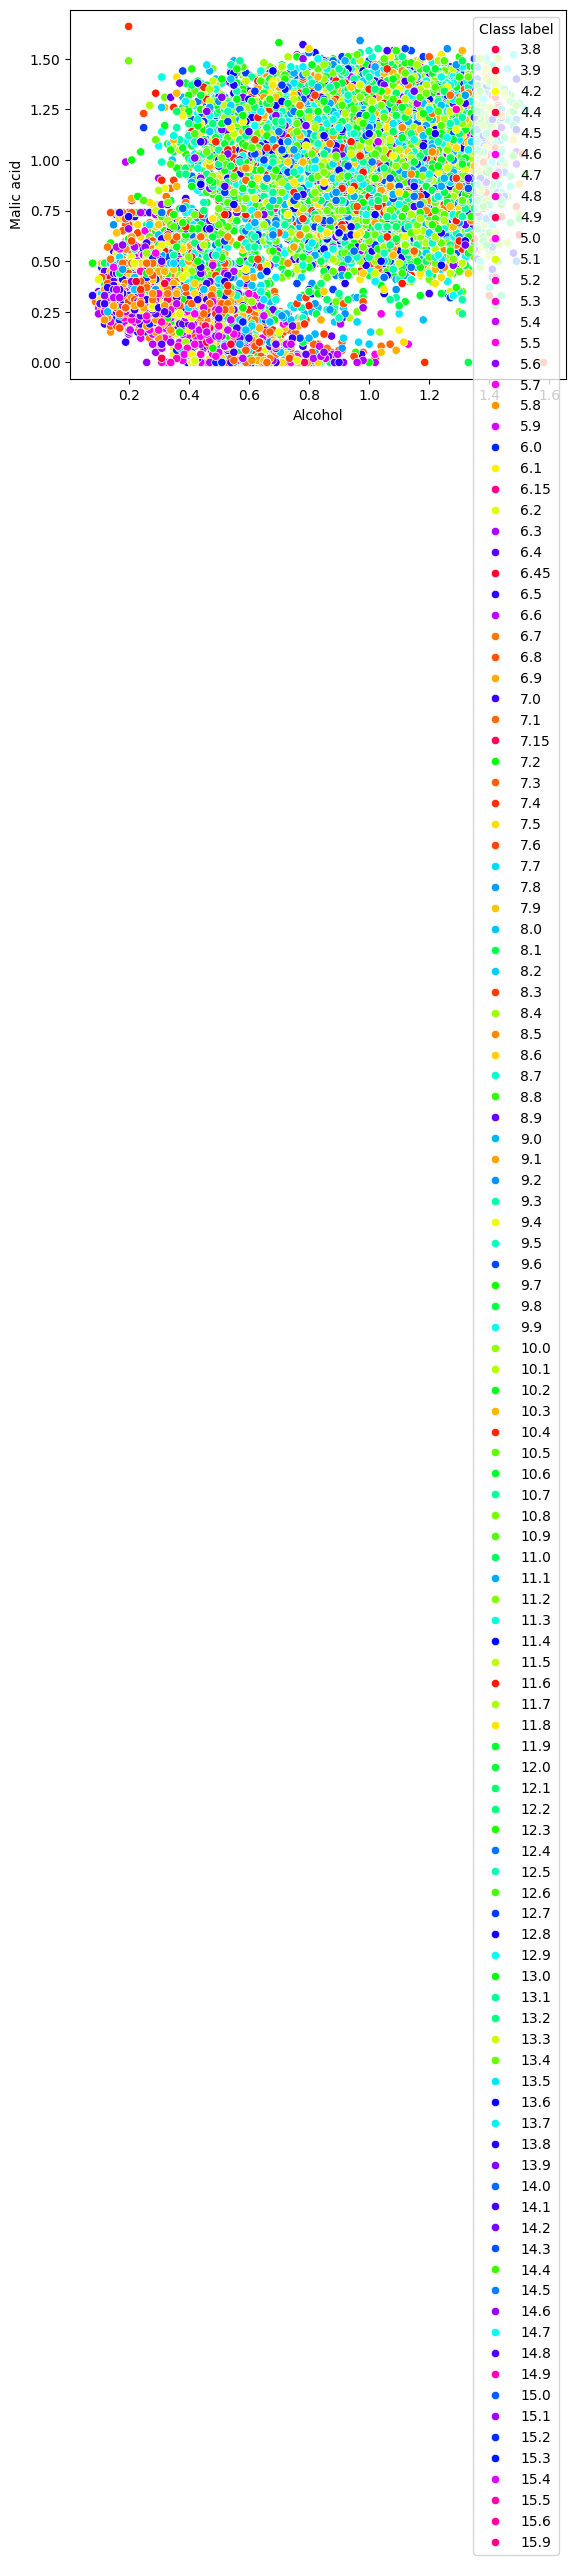

In [10]:
# Generate a color dictionary for all unique class labels
unique_labels = df['Class label'].unique()
color_palette = sb.color_palette("hsv", len(unique_labels))
color_dict = dict(zip(unique_labels, color_palette))

sb.scatterplot(x='Alcohol', y='Malic acid', hue='Class label', data=df, palette=color_dict)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                    df['Class label'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((14700, 2), (6301, 2))

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [14]:
np.round(X_train.describe(), 1)

,Alcohol,Malic acid
count,14699.0,14699.0
mean,0.8,0.8
std,0.4,0.4
min,0.1,0.0
25%,0.4,0.4
50%,0.8,0.9
75%,1.1,1.1
max,1.6,1.7


In [15]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic acid
count,14699.0,14699.0
mean,0.5,0.5
std,0.2,0.2
min,0.0,0.0
25%,0.2,0.2
50%,0.5,0.5
75%,0.7,0.7
max,1.0,1.0


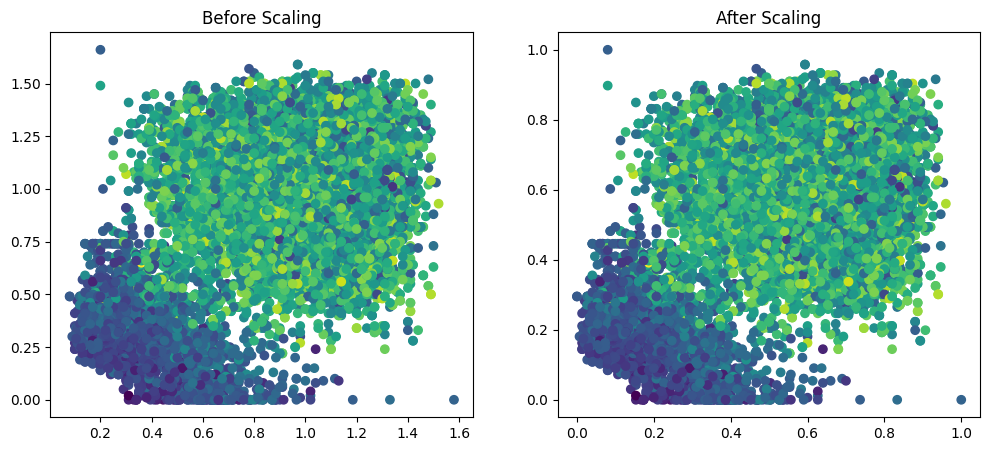

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

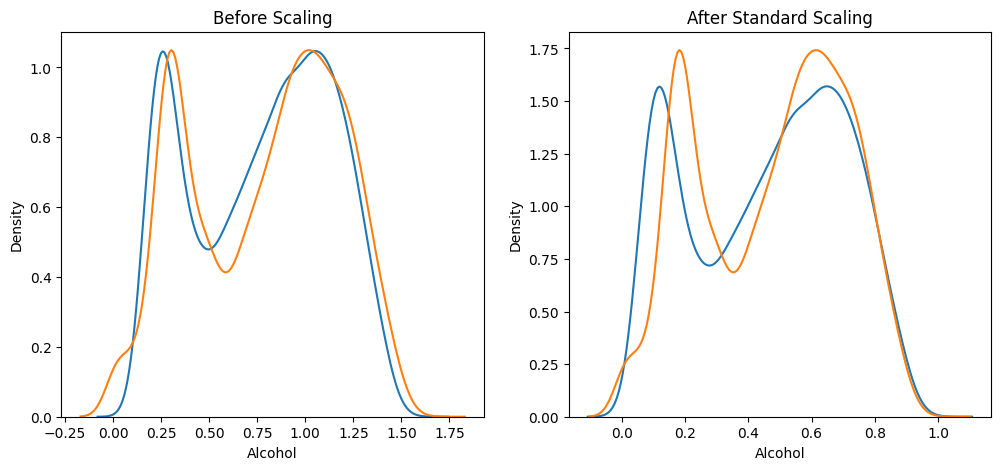

In [25]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sb.kdeplot(X_train['Alcohol'], ax=ax1)
sb.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sb.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sb.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()


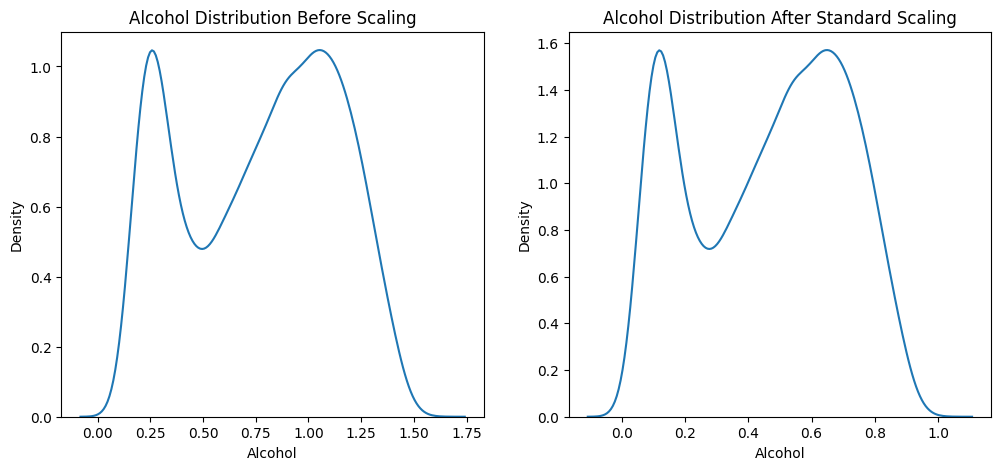

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sb.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sb.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

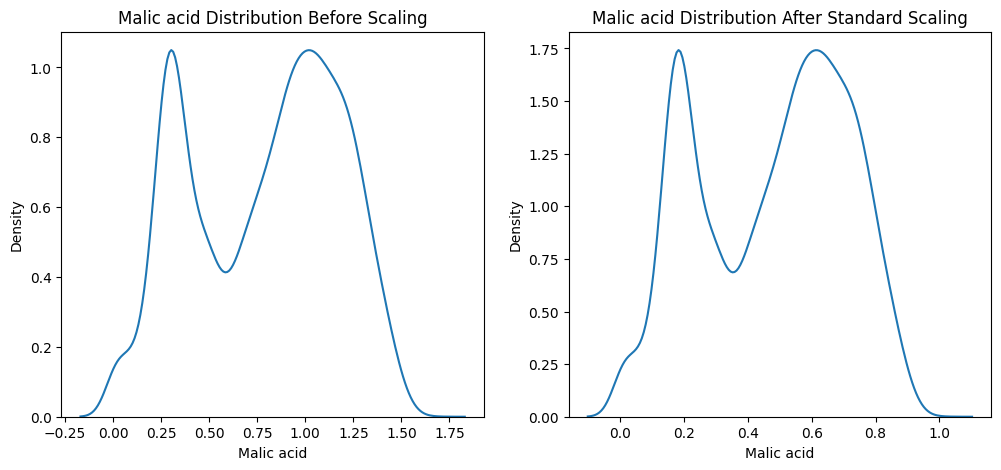

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sb.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sb.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()